In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import collections
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../KOBE_data/data.csv')

In [3]:
def top_plot_creator(column_name, n=5):
    """Creates histogram of top five most common elements in any column of the df"""
    counter_tuples = collections.Counter(df[column_name]).most_common(n)
    x = [obj[0] for obj in counter_tuples]
    y = [obj[1] for obj in counter_tuples]

    plot_boi = sns.barplot(x=x, y=y)
    plot_boi = plot_boi.set_xticklabels(plot_boi.get_xticklabels(), rotation=30)

### Not super useful, the top five types of shots but I think there are too many different categories for this variable for it to be super meaningful.

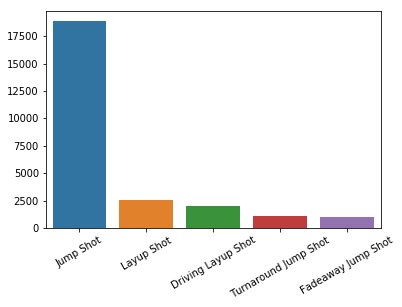

In [4]:
top_plot_creator('action_type')

### This is one of the more useful graphs; it displays the top five type of shots Kobe took throughout this career.

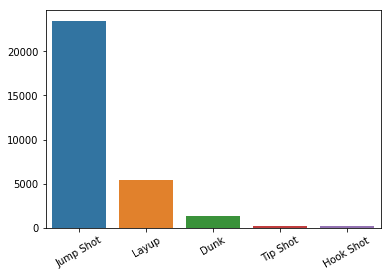

In [5]:
top_plot_creator('combined_shot_type')

### Shows distribution between playoff and non-playoff games. Probably won't display this information, but if we choose to I'd probably have a different type of graph.

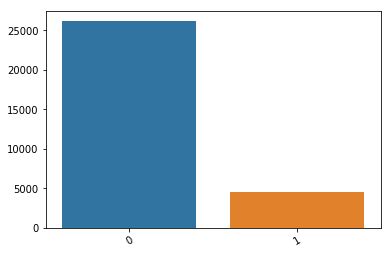

In [6]:
top_plot_creator('playoffs')

### Volume of shots per season, I don't think this is useful.

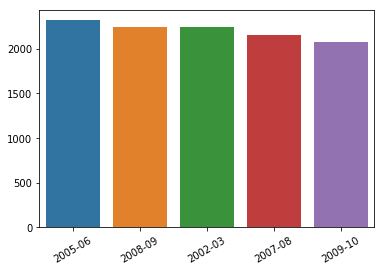

In [7]:
top_plot_creator('season')

### Three point shots versus two points shots. Potentially useful, but I don't like the bar chart format for this info.

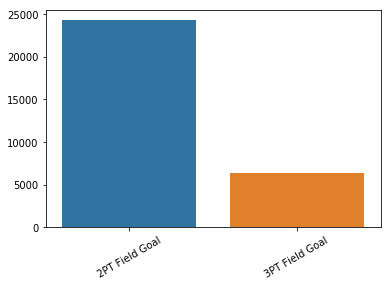

In [8]:
top_plot_creator('shot_type')

### I think this one is solid information.

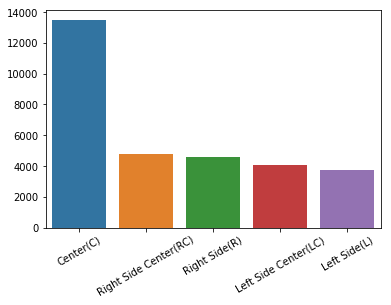

In [9]:
top_plot_creator('shot_zone_area')

### Probably just pick either the one above or this one.

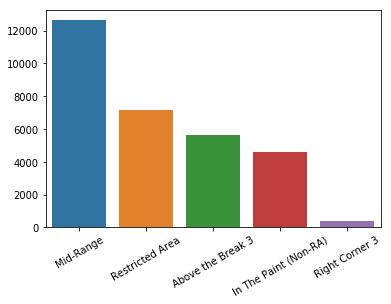

In [10]:
top_plot_creator('shot_zone_basic')

### Good to know, maybe we can make this graph sexier?

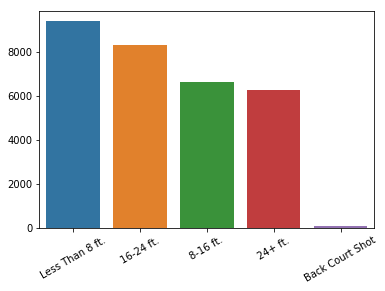

In [11]:
top_plot_creator('shot_zone_range')

### Not surprising, maybe not useful

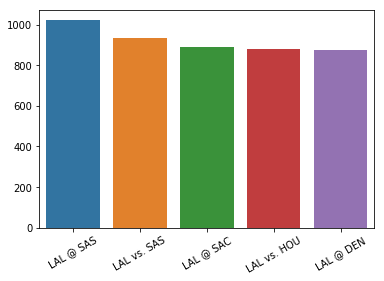

In [12]:
top_plot_creator('matchup')

### Choose either this one or the one above

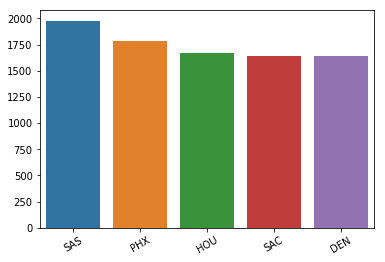

In [13]:
top_plot_creator('opponent')

### I like this one because it shows that Kobe tends to take over games towards the end of the quarter. I'll probably add one like this but for the entire game to see if his shots go up as the game goes on too.

/Users/jon_ross/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


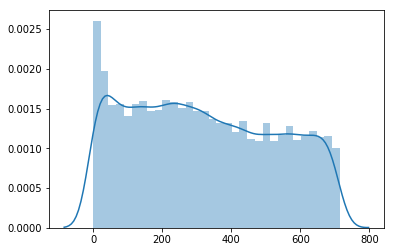

In [14]:
total_seconds_reamining = df.seconds_remaining + 60*df.minutes_remaining

sns.distplot(a=total_seconds_reamining, hist=True)

Despite how the kernel density appears, there are no entries that are less than 0

### I like this one, I didn't check the numbers but I think the peaks represent a common layup distance, the corner three point shot, and a non-corner three point shot.

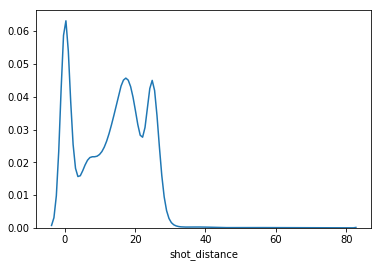

In [15]:
sns.distplot(a=df.shot_distance, hist=False)

### Probably not going to use this one

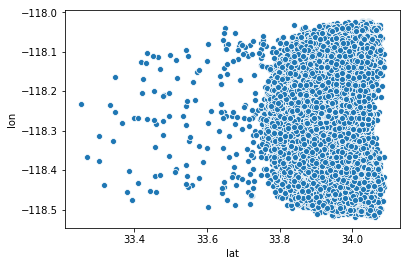

In [16]:
sns.scatterplot(x=df.lat, y=df.lon)

### Probably won't use this one either, it was just a development part of some of the graphs below

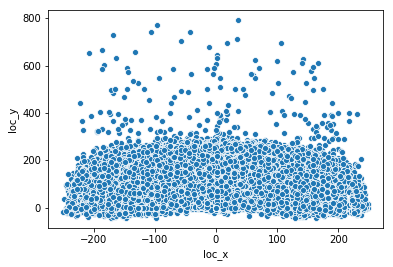

In [17]:
sns.scatterplot(x=df.loc_x, y=df.loc_y)

### I really don't like the way this one looks. This is the nice function seaborn has for these sort of two-dimensional density plots, and the examples online look really nice but I think this looks shitty. Below I went ahead and made my own two-dimensional density plots. I think mine look better than this, but if people like this one we can use this instead.

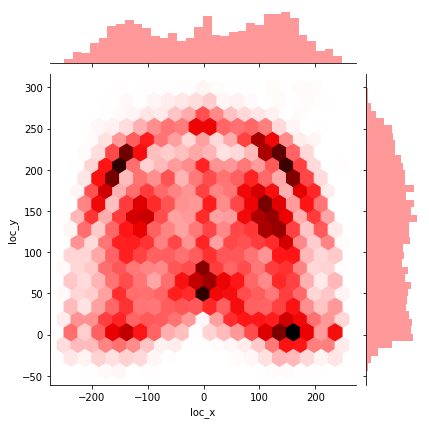

In [18]:
df_mod = df[(df.combined_shot_type == 'Jump Shot') & (df.loc_y < 300)]
sns.jointplot("loc_x", "loc_y", df_mod, kind = 'hex', color='red', gridsize=20)

### This is the previously described self-made density plot. We are able to tinker with the sizes of the dots, but this is the nicest looking one I've found. I want to change the color scheme though. 

For this one I had to consider only jump shots, because all the dunks and layups close to the hoop really dominated the data, so there was one black dot by the hoop, and the rest of the dots were all the same color.

/Users/jon_ross/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


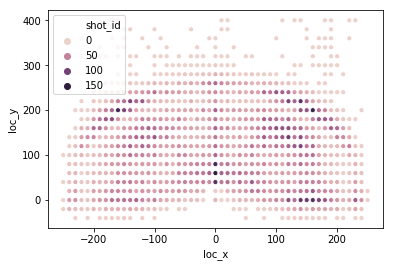

In [19]:
def myround(x, base):
    """function taken from https://stackoverflow.com/questions/2272149/round-to-5-or-other-number-in-python"""
    return int(base * round(float(x)/base))

x_bin_size = 10
y_bin_size = 20

df_new = df[(df.combined_shot_type == 'Jump Shot') & (df.loc_y < 400)]

df_new.loc[:, 'loc_x'] = df_new.loc[:, 'loc_x'].map(lambda num: myround(num, x_bin_size))
df_new.loc[:, 'loc_y'] = df_new.loc[:, 'loc_y'].map(lambda num: myround(num, y_bin_size))

count_table = df_new[['loc_x', 'loc_y', 'shot_id']].groupby(['loc_x', 'loc_y']).count().reset_index()
sns.scatterplot(x=count_table.loc_x, y=count_table.loc_y, hue=count_table.shot_id, s=25)

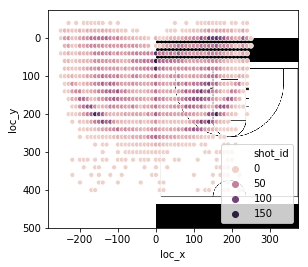

In [25]:
import matplotlib.image as mpimg
from PIL import Image

img = Image.open('images/basketball_court.png')
rotated_img = img.rotate(270)

# TODO: Get the size of the seaborn grapb and resize img

plt.imshow(rotated_img)
sns.scatterplot(x=count_table.loc_x, y=count_table.loc_y, hue=count_table.shot_id, s=25)

In [25]:
# img = plt.imshow('images/basketball_court.png')

### This is similar to above, but instead of shots taken, this is graphing field goal percentage. It's interesting to me that I don't see a clear decrease in percentage as we get further from the bucket.

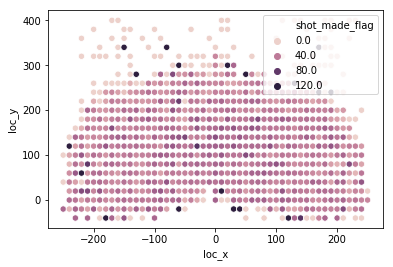

In [20]:
def myround(x, base):
    """function taken from https://stackoverflow.com/questions/2272149/round-to-5-or-other-number-in-python"""
    return int(base * round(float(x)/base))

x_bin_size = 10
y_bin_size = 20

df_new = df[(df.combined_shot_type == 'Jump Shot') & (df.loc_y < 400) & (df.shot_made_flag.notnull())]

df_new.loc[:, 'loc_x'] = df_new.loc[:, 'loc_x'].map(lambda num: myround(num, x_bin_size))
df_new.loc[:, 'loc_y'] = df_new.loc[:, 'loc_y'].map(lambda num: myround(num, y_bin_size))

count_table = df_new[['loc_x', 'loc_y', 'shot_made_flag']].groupby(['loc_x', 'loc_y']).mean().reset_index()
count_table['shot_made_flag'] = 100*count_table.shot_made_flag
sns.scatterplot(x=count_table.loc_x, y=count_table.loc_y, hue=count_table.shot_made_flag, s=40)

### Nothing crazy in this one, dunks and layups are taken close to the hoop. Who would have guessed?

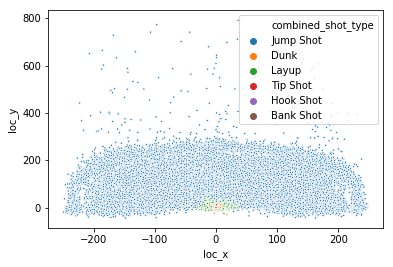

In [21]:
sns.scatterplot(x=df.loc_x, y=df.loc_y, s=5, hue=df.combined_shot_type)

### Field goal percentage on the different types of shots

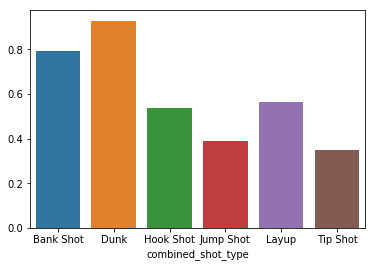

In [22]:
yo = df[df.shot_made_flag == 1].groupby(['combined_shot_type']).count()['shot_id'] /\
    df[(df.shot_made_flag == 0) | (df.shot_made_flag == 1)].groupby(['combined_shot_type']).count()['shot_id']
yo.index
yo.values
sns.barplot(x=yo.index, y=yo.values)